In [8]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [ ]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [2]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the numerical features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [3]:
display(data.head())

display(data.isnull().sum())

display(data.describe())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [4]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # Handle empty cluster: reinitialize centroid
                np.random.seed(self.random_state + i) # Use different seed for each empty cluster
                new_centroids[i] = X[np.random.choice(X.shape[0], 1)]
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            old_centroids = self.centroids
            self.labels = self._assign_clusters(X)
            self.centroids = self._update_centroids(X, self.labels)

            # Check for convergence
            if np.allclose(old_centroids, self.centroids):
                break

        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

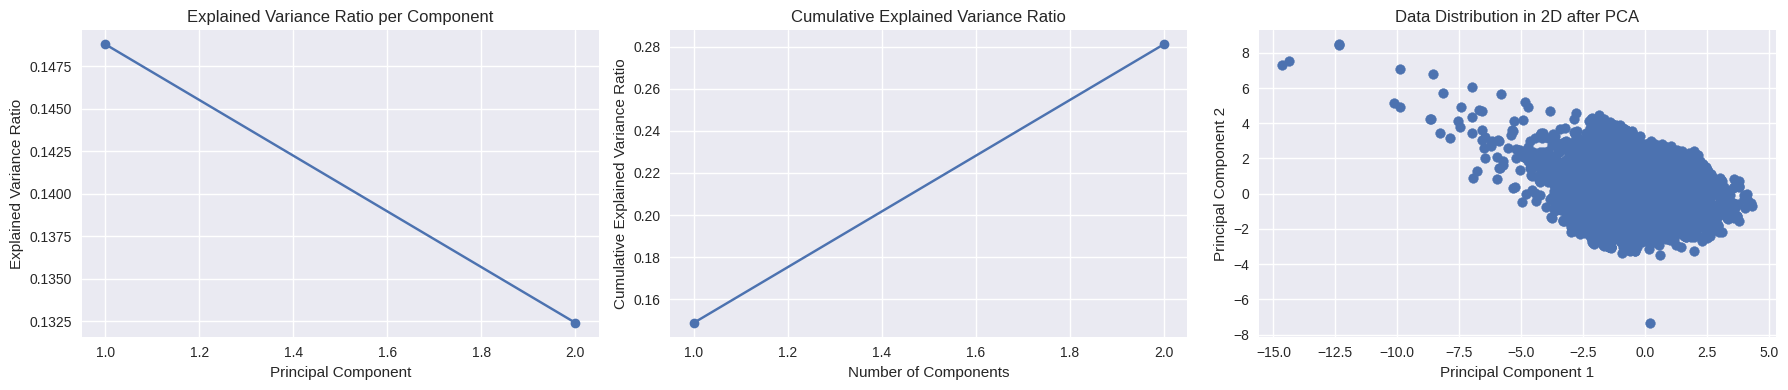

Shape after PCA: (45211, 2)


In [5]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(18, 4))

    # Plot explained variance
    plt.subplot(1, 3, 1)
    plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
    plt.title('Explained Variance Ratio per Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)

    # Plot cumulative explained variance
    plt.subplot(1, 3, 2)
    plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.grid(True)


    # Plot data in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.title('Data Distribution in 2D after PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

1. Explained Variance Ratio per Component: shows the proportion of the dataset's total variance that is captured by each individual principal component. the first few components explain a larger proportion and this value decreases for subsequent components. the plot helps identify the components that contribute most significantly to explaining the data's variability.

2. Cumulative Explained Variance Ratio: does the same as the previous plot but by including a cumulative number of principal components. 1st 2 components capture 28% of the total variance.

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Plotting elbow curve...


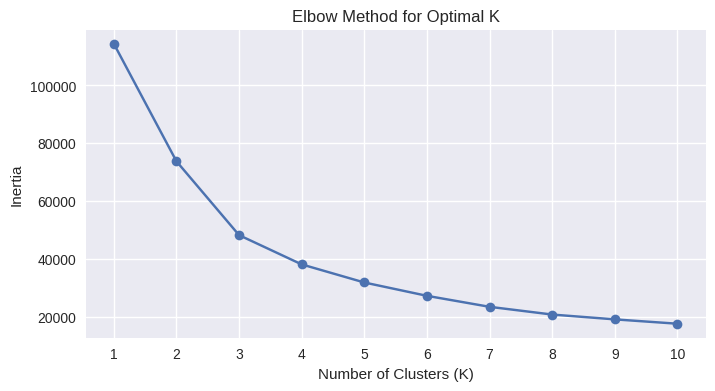

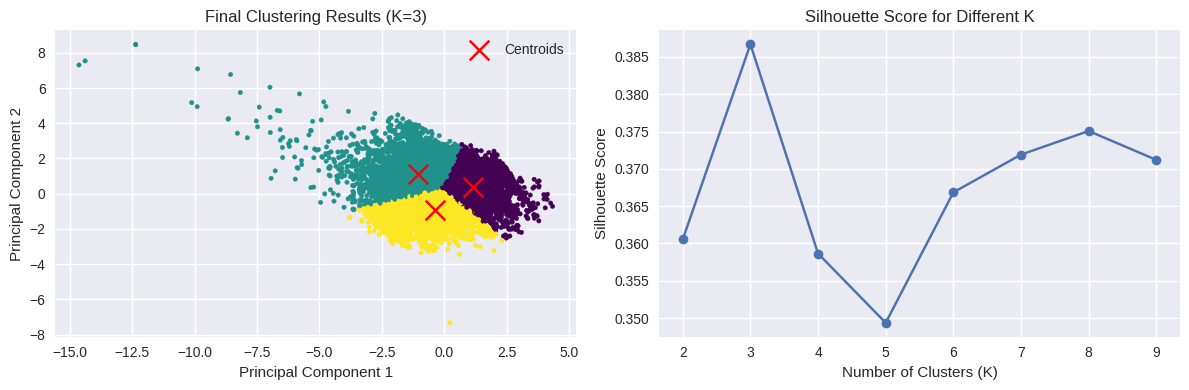


Clustering Evaluation (for chosen K):
Inertia: 48179.64
Silhouette Score: 0.39


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Create elbow plot
    plt.figure(figsize=(8, 4))
    plt.plot(K, inertias, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(K)
    plt.grid(True)
    plt.show()

    return inertias

# Try different numbers of clusters
print("Plotting elbow curve...")
inertias = plot_elbow_curve(X_pca)


# Apply final clustering
# Based on the elbow curve, choose an appropriate number of clusters. Let's start with 3.
optimal_k = 3
kmeans = KMeansClustering(n_clusters=optimal_k)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=10)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title(f'Final Clustering Results (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Plot evaluation metrics (Silhouette Score)
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
K_range = range(2, 10) # Silhouette score is not defined for k=1
for k in K_range:
    kmeans_eval = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_eval = kmeans_eval.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels_eval)
    silhouette_scores.append(silhouette_avg)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)


plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics for the chosen k
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation (for chosen K):")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

1. Elbow Method for Optimal K: plots number of clusters (K) against the inertia (within-cluster sum of squares). Inertia generally decreases as the number of clusters increases because the points are closer to their assigned centroids. The elbow point in this plot is the point where the rate of decrease in inertia sharply changes, which appears to be K = 3

2. Silhouette Score for Different K: The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. Plotting the silhouette score for different K values can help identify the number of clusters that results in the highest average silhouette score, suggesting a better-defined clustering structure. There is a large spike at K = 3 which suggests that the optimal number of clusters for this problem is 3.


After selecting an optimal number of clusters (K=3 in this case):
* Inertia: The final inertia value represents the sum of squared distances of samples to their closest cluster center for the chosen K (= 3). A lower inertia generally indicates better clustering, meaning the points are closer to their centroids. Inertia = 48179.64 provides a measure of the compactness of the clusters for K = 3.
* Silhouette Score: silhouette score = 0.39 is the average silhouette score across all data points for K = 3. This score ranges from -1 to +1. A score around 0.39 suggests that the clusters are somewhat separated, but there is still some overlap or points that are relatively close to the decision boundary between clusters. A higher positive score would indicate better-defined and more separated clusters.

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [7]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        current_label = 0
        self.centers_[current_label] = np.mean(X, axis=0)

        for i in range(1, self.n_clusters):
            # Select cluster to split (largest by size)
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster_label = unique_labels[np.argmax(counts)]

            # Get points in the largest cluster
            X_to_split = X[self.labels_ == largest_cluster_label]

            # Perform binary KMeans on the selected cluster
            kmeans_2 = KMeans(n_clusters=2, random_state=self.random_state + i, n_init=10) # Added n_init
            labels_2 = kmeans_2.fit_predict(X_to_split)

            # Find indices of points in the original dataset that belong to the selected cluster
            original_indices = np.where(self.labels_ == largest_cluster_label)[0]

            # Assign new labels
            # Keep one child with the original label
            self.labels_[original_indices[labels_2 == 0]] = largest_cluster_label
            # Assign a new label to the other child
            new_label = current_label + 1
            self.labels_[original_indices[labels_2 == 1]] = new_label

            # Record split and centroids
            self.split_tree[largest_cluster_label] = (largest_cluster_label, new_label)
            self.centers_[largest_cluster_label] = kmeans_2.cluster_centers_[0]
            self.centers_[new_label] = kmeans_2.cluster_centers_[1]

            current_label = new_label

        return self.labels_

# Example (for instructor use only):
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

Bisecting K-Means Silhouette Score: 0.3369
Calculating silhouette samples...
Generating plots...


/tmp/ipython-input-1240505310.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
/tmp/ipython-input-1240505310.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bisect, x='Cluster', y='Silhouette', palette='viridis')


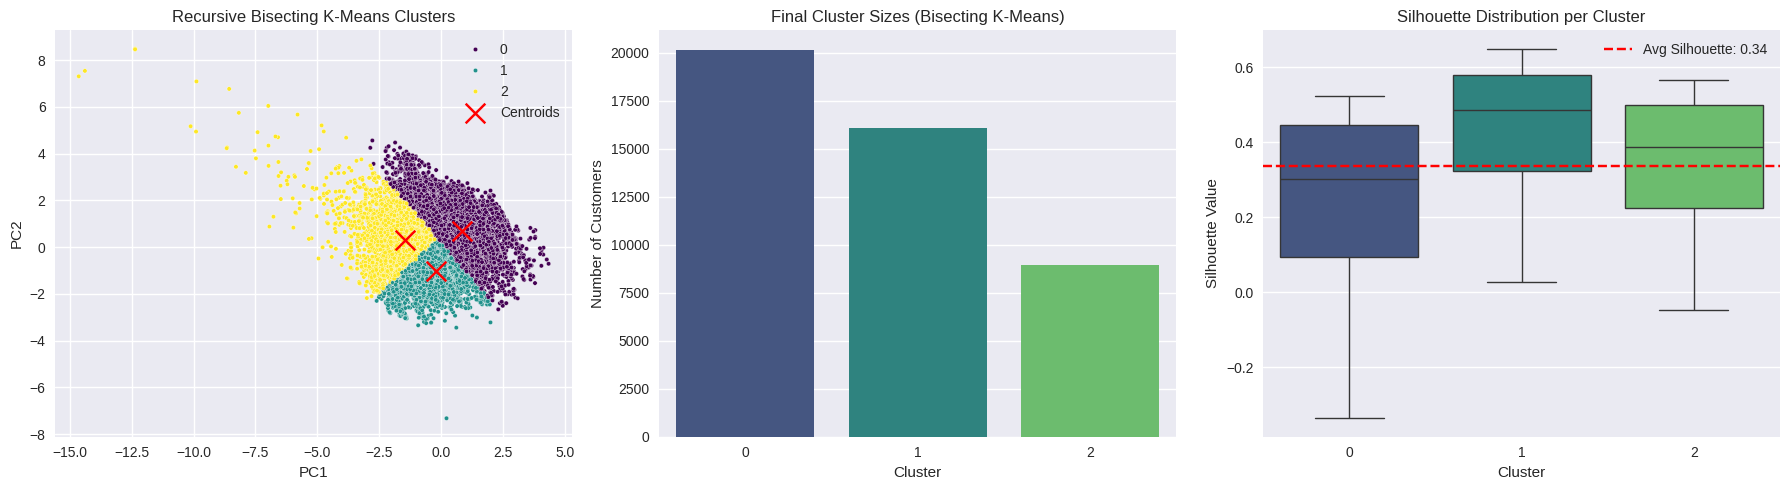

In [9]:
bisect_kmeans = BisectingKMeans(n_clusters=optimal_k, random_state=42)
bisect_labels = bisect_kmeans.fit_predict(X_pca)

# Calculate Silhouette Score for Bisecting K-Means
bisect_silhouette = silhouette_score(X_pca, bisect_labels)
print(f"Bisecting K-Means Silhouette Score: {bisect_silhouette:.4f}")

# Create a DataFrame for easier plotting with Seaborn
df_bisect = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_bisect['Cluster'] = bisect_labels

# Calculate silhouette samples (can be memory intensive, but needed for boxplot)
print("Calculating silhouette samples...")
df_bisect['Silhouette'] = silhouette_samples(X_pca, bisect_labels)

# --- Plotting Bisecting K-Means Results ---
print("Generating plots...")
plt.figure(figsize=(18, 5))

# 1. Scatter Plot of Clustering Results
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_bisect, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=10, legend='full')
# Plot centroids
bisect_centroids = np.array([bisect_kmeans.centers_[i] for i in range(optimal_k)])
plt.scatter(bisect_centroids[:, 0], bisect_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Recursive Bisecting K-Means Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)

# 2. Bar Plot of Cluster Sizes
plt.subplot(1, 3, 2)
cluster_counts = df_bisect['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Final Cluster Sizes (Bisecting K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# 3. Box Plot of Silhouette Distribution per Cluster
plt.subplot(1, 3, 3)
sns.boxplot(data=df_bisect, x='Cluster', y='Silhouette', palette='viridis')
plt.axhline(y=bisect_silhouette, color='red', linestyle='--', label=f'Avg Silhouette: {bisect_silhouette:.2f}')
plt.title('Silhouette Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Value')
plt.legend()

plt.tight_layout()

1. Final Cluster Sizes (Bisecting K-Means): This bar plot displays the number of data points assigned to each cluster by the Bisecting K-Means algorithm.
|Number of clusters|Number of data points (Customers)|
|---|---|
|0|≈ 20000|
|1|≈ 16000|
|2|≈ 9500|

2.  Silhouette Distribution per Cluster (Box Plot): shows the spread of individual silhouette scores within each cluster. The red dashed line indicates the average silhouette score (= 0.39) for all data points.
    * cluster 0: median is below average, indicating that the points may not be cohesive within this cluster, many points likely have low/negative sihouette scores.
    * cluster 1: median silhouette is above average (highest among the 3), many points in this cluster might have positive silhouette scores, they are well assigned to the cluster 1 and well separated from the rest of the cluster.
    * cluster 2: similar to cluster 1, the median is above average, indicating cohesiveness of the data points within cluster 2.

The Bisecting K-Means Silhouette Score = 0.3369 is the average silhouette score for the clustering produced by the Bisecting K-Means algorithm with the chosen number of clusters. Comparing this value to the average silhouette score obtained from the standard K-Means (0.39), the standard method had a slightly higher average silhouette score.

Based on the sihouette metric, the standard method generates clusters that are more well defined and effective in separating their data points from the other clusters.

Generating Feature Correlation Matrix...
Saved 'feature_correlation_matrix.png'


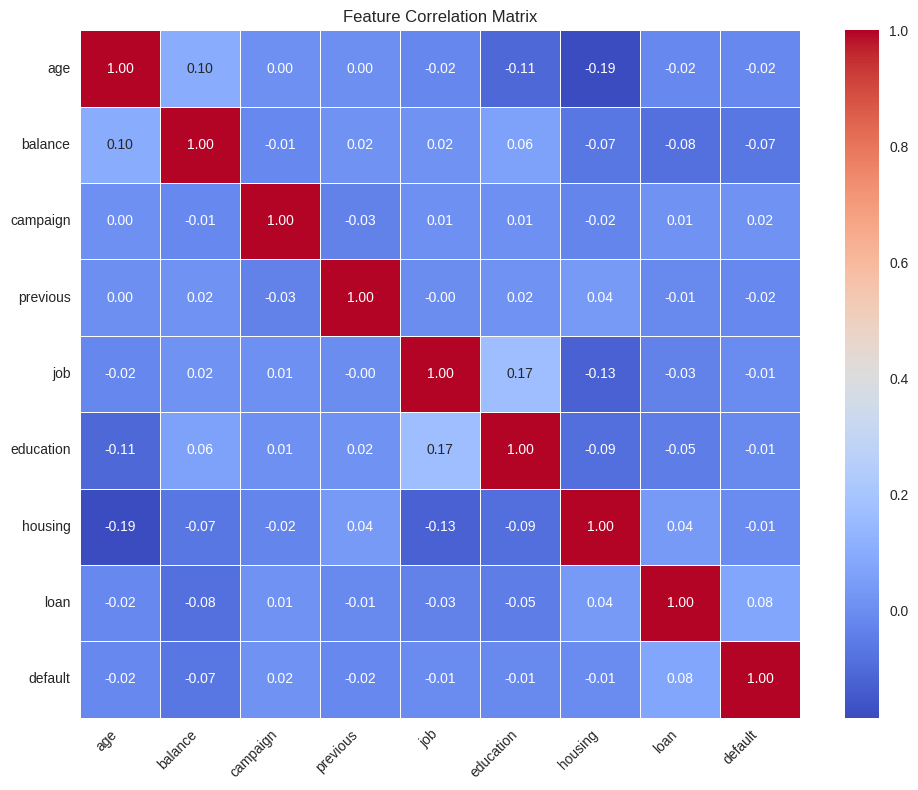

In [11]:
print("Generating Feature Correlation Matrix...")
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
           'housing', 'loan', 'default']
corr_matrix = data[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('feature_correlation_matrix.png')
print("Saved 'feature_correlation_matrix.png'")

/tmp/ipython-input-3755044935.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
/tmp/ipython-input-3755044935.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_kmeans, x='Cluster', y='Silhouette', palette='viridis')


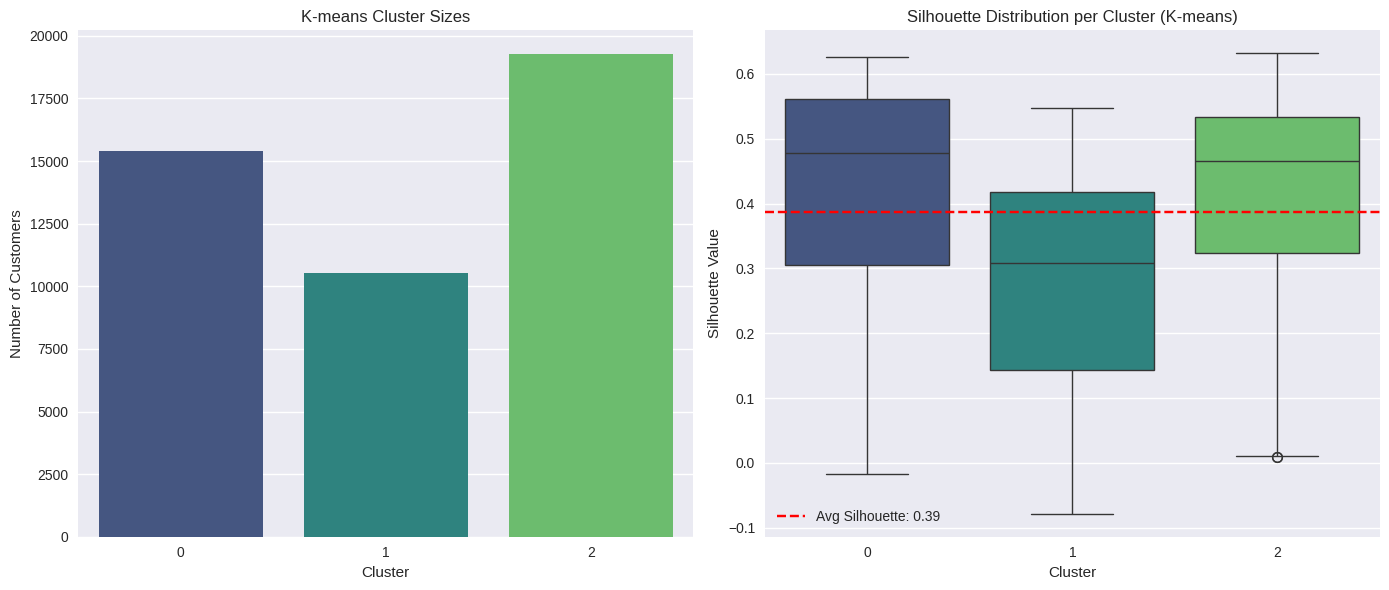

In [12]:
# Calculate silhouette scores
silhouette_avg = silhouette_score(X_pca, kmeans.labels)
silhouette_vals = silhouette_samples(X_pca, kmeans.labels)

# Create a DataFrame for easier plotting
df_kmeans = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_kmeans['Cluster'] = kmeans.labels
df_kmeans['Silhouette'] = silhouette_vals

# Create the figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Bar Plot of Cluster Sizes
plt.subplot(1, 2, 1)
cluster_counts = df_kmeans['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('K-means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# Subplot 2: Box Plot of Silhouette Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df_kmeans, x='Cluster', y='Silhouette', palette='viridis')
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label=f'Avg Silhouette: {silhouette_avg:.2f}')
plt.title('Silhouette Distribution per Cluster (K-means)')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Value')
plt.legend()

plt.tight_layout()

1. K-means Cluster Sizes (Bar Plot): shows the distribution of data points across the clusters assigned by the standard K-means algorithm.
|Number of clusters|Number of data points (Customers)|
|---|---|
|0|≈ 15000|
|1|≈ 10000|
|2|≈ 20000|

2.  Silhouette Distribution per Cluster (Box Plot): shows the spread of individual silhouette scores within each cluster. The red dashed line indicates the average silhouette score (= 0.39) for all data points.
    * cluster 0: median silhouette is above average, many points in this cluster might have positive silhouette scores, they are well assigned to the cluster 0. the low whisker indicates some outliers with negative scores.
    * cluster 1: median is below average, indicating that the points may not be cohesive within this cluster, many points likely have low/negative sihouette scores.
    * cluster 2: the box plot looks similar to that of cluster 0, indicating similar cohesiveness of the data points within cluster 2.